# ANN from scratch ( ANN with 2 layers )

In [1]:
import tensorflow as tf
import numpy 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Check the tf version
tf.__version__

'2.15.0'

In [6]:
#######################################################################################
#######################################################################################
##################       Import the data set and create the initial set up   ##########
#######################################################################################
#######################################################################################
#######################################################################################


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T  ### Here we take the transpose as our data matrix . So each column is corresponding to an observation 
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.     ##### Divide each pixel by 255 

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

<img src="WhatsApp Image 2024-04-24 at 01.04.38.jpeg"  width="680" />
<img src="WhatsApp Image 2024-04-24 at 01.04.39.jpeg"  width="680" />
<img src="WhatsApp Image 2024-04-24 at 01.04.39 (1).jpeg" width="680" />
<img src="WhatsApp Image 2024-04-24 at 01.04.39 (2).jpeg" width="680" />

In [3]:
####### Lets build a ANN with 2 layers 
###### Since we got 28 * 28 pixel images there will be 784 inputs 
##### In each layer there will be 10 neurons 

## self.weights = np.random.randn(10,784) * (1e-4)
'''
gmoid(x):
    return 1 / (1 + np.exp(-x))

'''
## np.random.rand(10, 784) - 0.5

In [21]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def sigmoid_deriv(z):
    return sigmoid(z)*(1-sigmoid(z))

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    
    dZ2 = (A2 - one_hot_Y)
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2)

    
    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)
    dW1 = (1 / m )* dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [22]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [23]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 9 ... 9 9 9] [3 5 9 ... 3 3 1]
0.10373170731707317
Iteration:  10
[9 9 9 ... 9 4 9] [3 5 9 ... 3 3 1]
0.10229268292682926
Iteration:  20
[9 9 9 ... 9 4 9] [3 5 9 ... 3 3 1]
0.1058780487804878
Iteration:  30
[9 9 9 ... 9 4 9] [3 5 9 ... 3 3 1]
0.1315609756097561
Iteration:  40
[9 9 9 ... 9 4 1] [3 5 9 ... 3 3 1]
0.1587560975609756
Iteration:  50
[4 9 9 ... 5 4 1] [3 5 9 ... 3 3 1]
0.17885365853658536
Iteration:  60
[4 9 9 ... 5 4 1] [3 5 9 ... 3 3 1]
0.19919512195121952
Iteration:  70
[1 9 9 ... 5 0 1] [3 5 9 ... 3 3 1]
0.22253658536585366
Iteration:  80
[1 9 9 ... 5 0 1] [3 5 9 ... 3 3 1]
0.2536829268292683
Iteration:  90
[1 9 9 ... 8 0 1] [3 5 9 ... 3 3 1]
0.2891219512195122
Iteration:  100
[1 9 9 ... 8 0 1] [3 5 9 ... 3 3 1]
0.32409756097560977
Iteration:  110
[1 9 9 ... 8 7 1] [3 5 9 ... 3 3 1]
0.3562439024390244
Iteration:  120
[1 9 9 ... 8 7 1] [3 5 9 ... 3 3 1]
0.38141463414634147
Iteration:  130
[1 9 9 ... 8 7 1] [3 5 9 ... 3 3 1]
0.4030487804878049
Iteration:

In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


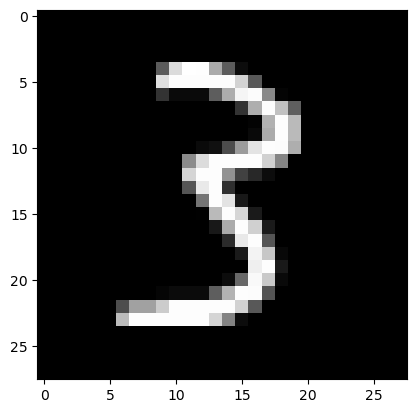

Prediction:  [3]
Label:  5


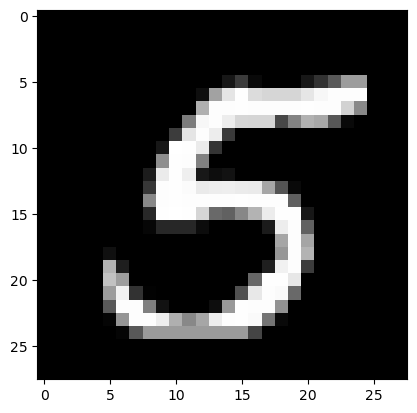

Prediction:  [9]
Label:  9


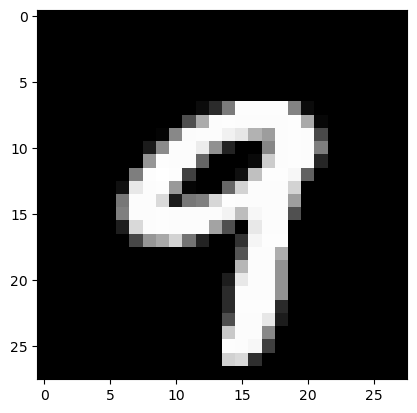

Prediction:  [1]
Label:  1


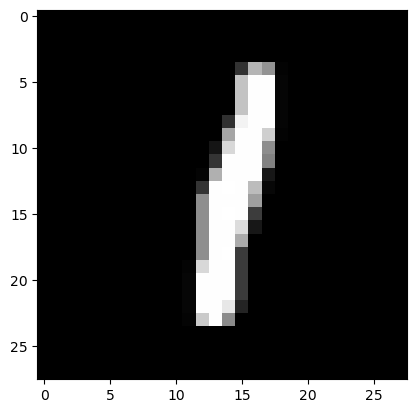

In [25]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [26]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 9 3 7 2 1 1 0 7 7 0 0 2 3 0 4 9 8 5 7 2 7 0 7 9 6 2 1 3 1 9 8 2 0 9 9 1
 3 9 9 0 6 3 1 0 3 3 9 1 0 0 7 8 3 8 9 5 3 3 6 1 6 3 4 3 2 1 1 6 4 8 3 3 4
 5 3 8 7 3 1 6 2 4 0 5 2 3 3 1 9 3 1 7 2 3 3 5 0 0 0 4 1 0 8 2 2 7 3 8 9 9
 1 6 2 8 6 1 3 0 3 9 8 3 1 1 0 9 9 7 1 3 7 2 5 3 8 7 7 4 4 7 8 1 1 7 1 3 7
 7 8 5 4 4 7 3 5 9 6 1 1 1 1 8 9 3 0 1 4 1 0 8 0 1 6 6 0 9 3 9 6 3 2 9 5 0
 3 6 9 0 2 8 1 7 2 0 0 2 3 6 0 1 1 3 2 5 2 0 1 7 7 8 6 3 7 2 1 7 7 9 7 4 0
 7 6 3 7 8 3 2 2 7 8 4 1 1 3 9 2 9 7 1 1 6 3 6 1 1 2 6 2 0 9 9 2 1 8 7 0 4
 1 9 2 7 6 1 3 6 1 9 3 3 7 1 7 0 3 1 2 3 6 4 9 9 6 3 8 9 7 0 6 9 3 0 2 6 5
 8 8 1 8 4 1 3 9 7 9 0 1 2 6 7 2 7 4 9 3 4 0 4 6 0 1 2 3 4 8 8 1 9 2 6 6 9
 6 0 2 2 4 3 0 4 6 9 4 7 5 1 9 4 9 3 9 7 3 2 7 6 0 3 9 9 0 3 0 8 4 6 1 6 9
 1 4 8 3 0 8 2 5 6 7 7 1 3 0 2 3 5 6 3 0 2 4 4 3 7 8 0 0 5 0 7 6 9 7 9 2 2
 4 2 8 1 8 0 6 0 6 9 2 4 2 1 3 8 1 1 1 1 4 9 2 6 9 6 7 1 9 7 6 6 2 9 3 3 4
 7 1 9 1 1 0 8 0 6 0 7 6 3 2 1 3 3 6 4 9 7 4 9 1 8 4 1 2 9 6 3 7 3 6 1 3 8
 7 0 5 2 6 6 9 9 2 9 1 7 

0.707

# Lets do the samething with Relu activation 

In [27]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [28]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)